In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.linspace(-np.pi, np.pi, 2000)
S1 = np.sin(X/2+np.pi/2)
S2 = np.sin(X*30)*0.1

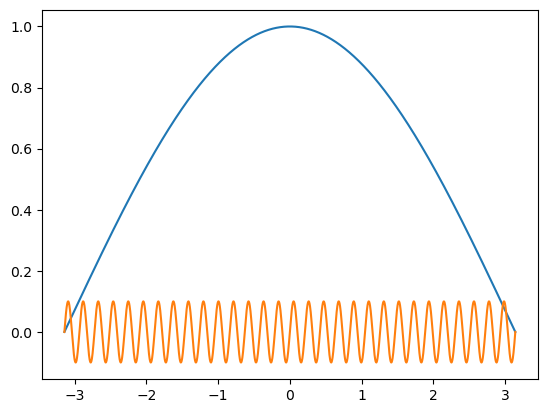

In [15]:
plt.plot(X, S1)
plt.plot(X, S2)

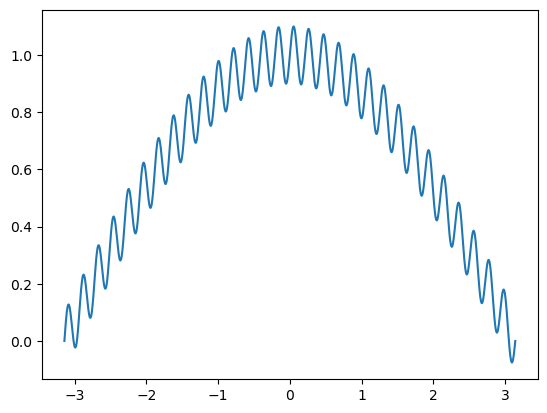

In [16]:
S3 = S1 + S2
plt.plot(X, S3)

In [17]:
def convolution(signal, kernel):
    nS = len(signal)
    nK = len(kernel)
    C = []

    for i in range(0, nS-nK+1):
        window = signal[i:i+nK]
        c = np.dot(kernel, window)
        C.append(c)

    return np.array(C)

In [18]:
K = np.ones(300) / 300

In [19]:
S4 = convolution(S3, K)

In [20]:
S3.shape, S4.shape

((2000,), (1701,))

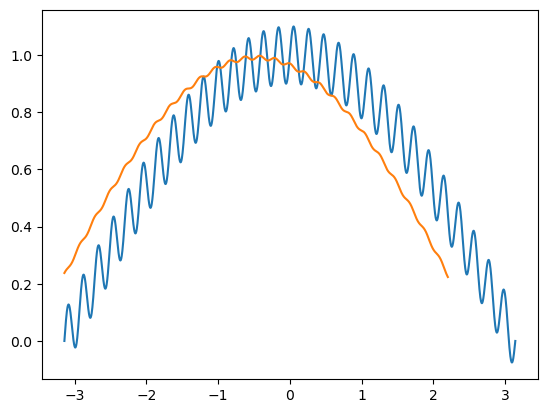

In [21]:
plt.plot(X, S3)
plt.plot(X[:1701], S4)

In [22]:
def convolution_2D(channel, kernel):
    channel_h,channel_w = channel.shape
    kernel_h, kernel_w = kernel.shape

    result_w = channel_w - kernel_w + 1
    result_h = channel_h - kernel_w + 1
    result = np.empty((result_h, result_w))

    for i in range(0, result_w):
        for j in range(0, result_h):
            window = channel[i:i+kernel_h, j:j+kernel_w]
            c = (window * kernel).sum()
            result[i, j] = c

    return result


In [23]:
from matplotlib.image import imread

In [24]:
image = imread("test.png")

In [25]:
image.shape

(512, 512, 3)

In [26]:
red_channel = image[:,:,0]

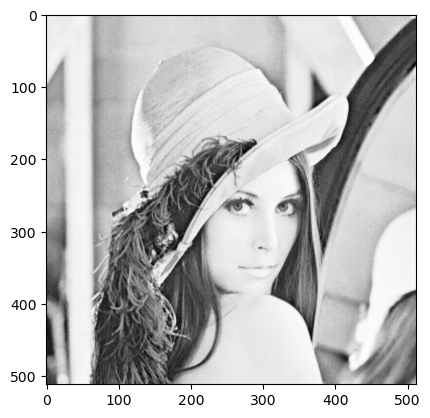

In [27]:
plt.imshow(red_channel, cmap="Greys_r");

In [28]:
kernel1 = np.ones((50, 50)) / 2500
kernel1

array([[0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       ...,
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004]])

In [29]:
result1 = convolution_2D(red_channel, kernel1)

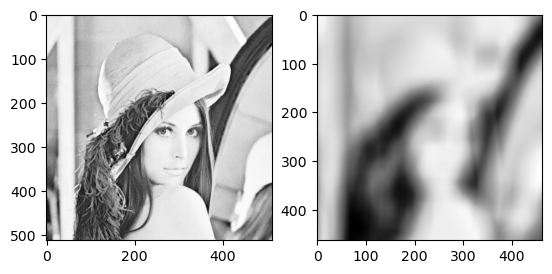

In [30]:
plt.subplot(1, 2, 1)
plt.imshow(red_channel, cmap="Greys_r");
plt.subplot(1, 2, 2)
plt.imshow(result1, cmap="Greys_r");


In [31]:
kernel2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
kernel2 = kernel2 / 9

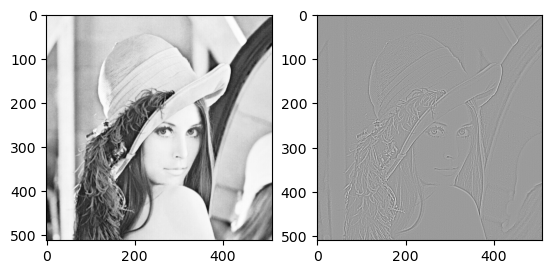

In [61]:
result = convolution_2D(red_channel, kernel2)
plt.subplot(1, 2, 1)
plt.imshow(red_channel, cmap="Greys_r");
plt.subplot(1, 2, 2)
plt.imshow(result, cmap="Greys_r");

In [63]:
kernel3 = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
kernel3 = kernel3 / 3

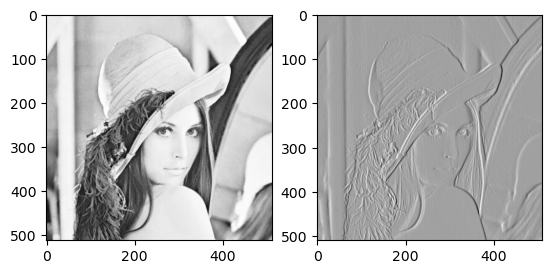

In [64]:
result = convolution_2D(red_channel, kernel3)
plt.subplot(1, 2, 1)
plt.imshow(red_channel, cmap="Greys_r");
plt.subplot(1, 2, 2)
plt.imshow(result, cmap="Greys_r");

In [69]:
kernel4 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
kernel4 = kernel4 / 3

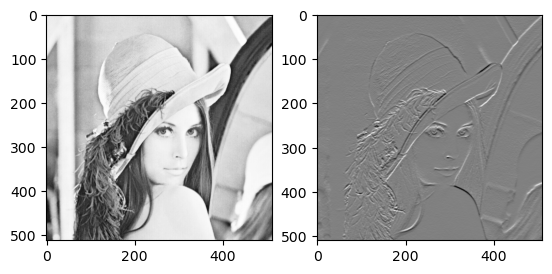

In [70]:
result = convolution_2D(red_channel, kernel4)
plt.subplot(1, 2, 1)
plt.imshow(red_channel, cmap="Greys_r");
plt.subplot(1, 2, 2)
plt.imshow(result, cmap="Greys_r");